### Getting Historical Data

In [34]:
import yfinance as yf

stock=input('enter a valid stock name : ')
print('This only deals with stocks listed on NSE & NASDAQ \n')
print(f'\n***************{stock}***************\n')

def convert_stock_NS(stock_name):
    NSE_STOCK=f'{stock_name}.NS'
    return NSE_STOCK

ans=input('Is your stock listed on NSE (y/n) : ')
if ans=='y':
    NSE_stock=convert_stock_NS(stock)
    stock_data=yf.download(NSE_stock,period="5y")
else :
    stock_data=yf.download(stock,period="5y")    

print(stock_data.head())

This only deals with stocks listed on NSE & NASDAQ 


***************ITC***************



[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-10-25  256.899994  257.200012  247.000000  247.699997  202.601166   
2019-10-27  249.949997  251.100006  249.699997  250.399994  204.809586   
2019-10-29  250.949997  255.100006  249.550003  253.250000  207.140701   
2019-10-30  256.000000  264.000000  254.300003  259.399994  212.170944   
2019-10-31  260.000000  262.850006  256.200012  257.649994  210.739548   

              Volume  
Date                  
2019-10-25  32591192  
2019-10-27   3131726  
2019-10-29  11937562  
2019-10-30  34291157  
2019-10-31  16654994  


### Getting Live data

In [35]:
import yfinance as yf
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
if ans=='y':
    NSE_stock=convert_stock_NS(stock)
    recent_data=yf.download(tickers=NSE_stock,period="3mo",interval='60m')
else :
    recent_data=yf.download(stock,period="3mo", interval='60m')  
print(f'\n***************{stock}***************\n')

print(recent_data.head())

[*********************100%%**********************]  1 of 1 completed


***************ITC***************

                           Open        High         Low       Close  \
Datetime                                                              
2024-07-26 09:15:00  490.750000  493.399994  487.399994  492.750000   
2024-07-26 10:15:00  492.750000  496.000000  492.750000  495.200012   
2024-07-26 11:15:00  495.149994  495.649994  491.200012  492.799988   
2024-07-26 12:15:00  492.799988  496.549988  491.950012  496.299988   
2024-07-26 13:15:00  496.299988  500.000000  495.350006  499.549988   

                      Adj Close   Volume  
Datetime                                  
2024-07-26 09:15:00  492.750000  2569217  
2024-07-26 10:15:00  495.200012  2814691  
2024-07-26 11:15:00  492.799988  1909545  
2024-07-26 12:15:00  496.299988  1287733  
2024-07-26 13:15:00  499.549988  2345671  


### wrapping data & graphing

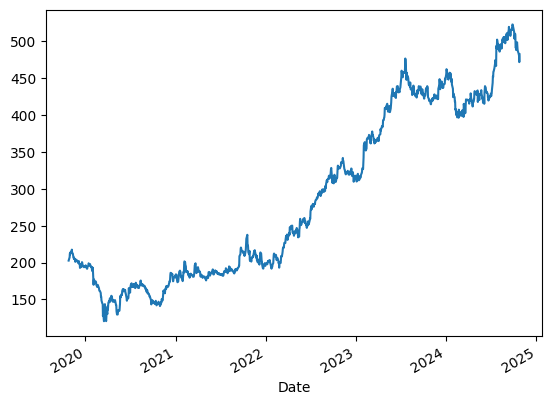

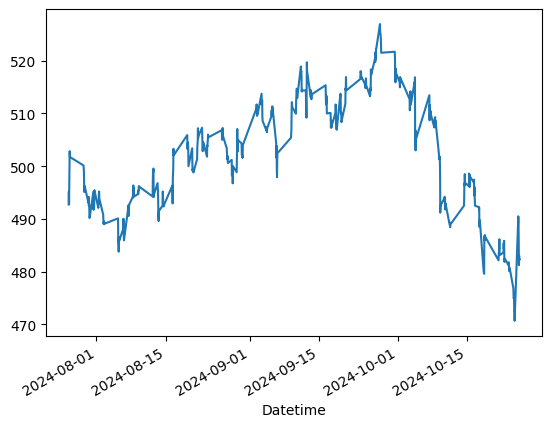

                          close
Datetime                       
2024-07-26 09:15:00  492.750000
2024-07-26 10:15:00  495.200012
2024-07-26 11:15:00  492.799988
2024-07-26 12:15:00  496.299988
2024-07-26 13:15:00  499.549988


In [36]:
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
stock_data['Adj Close'].plot()
plt.show()

# Plot the close price of the AAPL
recent_data['Adj Close'].plot()
plt.show()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', None)
from stockstats import wrap
wrapped_data = wrap(recent_data)
wrapped_data.init_all()
#print(wrapped_data)
historical_data=wrapped_data[['close']] #,'trix','middle','vwma','high','low','volume','ppo'
print(historical_data.head())

### Making the data

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np


def Sequential_Input_LSTM(df, input_sequence):
    df_np = df.to_numpy()
    X = []
    y = []
    
    for i in range(len(df_np) - input_sequence):
        row = [a for a in df_np[i:i + input_sequence]]
        X.append(row)
        label = df_np[i + input_sequence]
        y.append(label)
        
    return np.array(X), np.array(y)

n_input = 10

X, y = Sequential_Input_LSTM(historical_data, n_input)

# fix random seed for reproducibility
train_X=X[:-100]
Val_X=X[-100:]
train_y=y[:-100]
val_y=y[-100:]



### Creating the Model

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                  │ (None, 10, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 10, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,817 (593.04 KB)

 Trainable params: 151,817 (593.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50000
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 504.2185 - root_mean_squared_error: 504.8109 - val_loss: 489.6393 - val_root_mean_squared_error: 490.2250
Epoch 2/50000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 504.4367 - root_mean_squared_error: 505.0294 - val_loss: 489.4504 - val_root_mean_squared_error: 490.0361
Epoch 3/50000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 504.7085 - root_mean_squared_error: 505.3045 - val_loss: 489.2354 - val_root_mean_squared_error: 489.8211
Epoch 4/50000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 504.6516 - root_mean_squared_error: 505.2430 - val_loss: 488.9735 - val_root_mean_squared_error: 489.5594
Epoch 5/50000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 504.1689 - root_mean_squared_error: 504.7562 - val_loss: 488.5036 - val_root_mean_squared_error: 489.0896
Epoch 6/50000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 502.5461 - root_mean_squared_error: 503.1382 - val_loss: 487.7416 - val_root_mean_squared_error: 4

<Axes: >

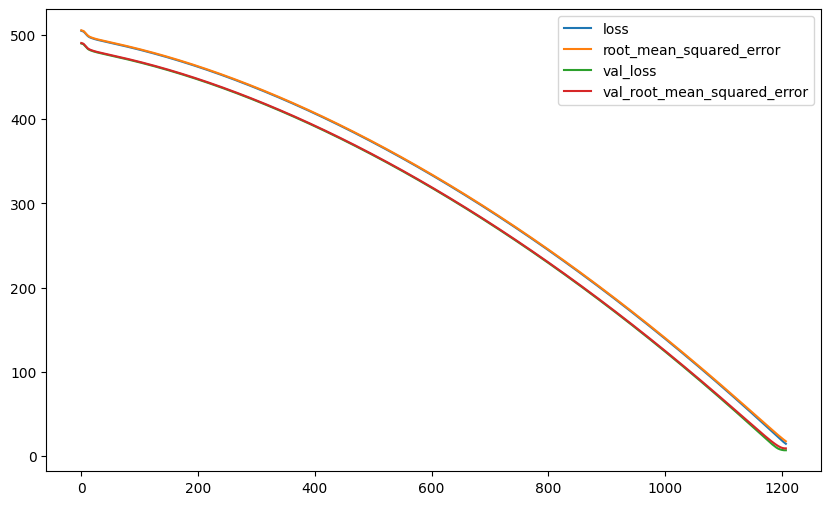

In [38]:
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

n_features = 1

model1 = Sequential()

model1.add(InputLayer((n_input,n_features)))
model1.add(LSTM(100, return_sequences = True))     
model1.add(LSTM(100, return_sequences = True))
model1.add(LSTM(50))
model1.add(Dense(8, activation = 'relu'))
model1.add(Dense(1, activation = 'linear'))

model1.summary()

early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

from tensorflow.keras.losses import Huber

model1.compile(loss=Huber(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


model1.fit(train_X, train_y, 
           validation_data = (Val_X, val_y), 
           epochs = 50000, 
           callbacks = [early_stop])

losses_df1 = pd.DataFrame(model1.history.history)

losses_df1.plot(figsize = (10,6))

### Future Predictions

In [43]:
def futureForecast(df, col, n_input, n_features, forecast_timeperiod, model):

    x_input = np.array(df[len(df)-n_input:][col])

    stock_input=list(x_input)

    lst_output=[]
    i=0

    while(i < forecast_timeperiod):

        if(len(stock_input) > n_input):

            x_input = np.array(stock_input[1:])
            x_input = x_input.reshape((1, n_input, n_features))
            yhat = model.predict(x_input, verbose=0)
            stock_input.append(yhat[0][0])
            stock_input = stock_input[1:]
            lst_output.append(yhat[0][0])

            i=i+1

        else:
            x_input = x_input.reshape((1, n_input, n_features))
            yhat = model.predict(x_input, verbose=0)
            #print(yhat[0])
            stock_input.append(yhat[0][0])
            lst_output.append(yhat[0][0])

            i=i+1
            
    return lst_output

n_features = 1
forecast_timeperiod = 2         # next 10 days as 24hrs 
model = model1

forecast_output = futureForecast(historical_data, 
                                 'close', 
                                 n_input, 
                                 n_features, 
                                 forecast_timeperiod, 
                                 model)

print (forecast_output)


[490.80838, 490.80838]


Text(0, 0.5, 'Stock Price')

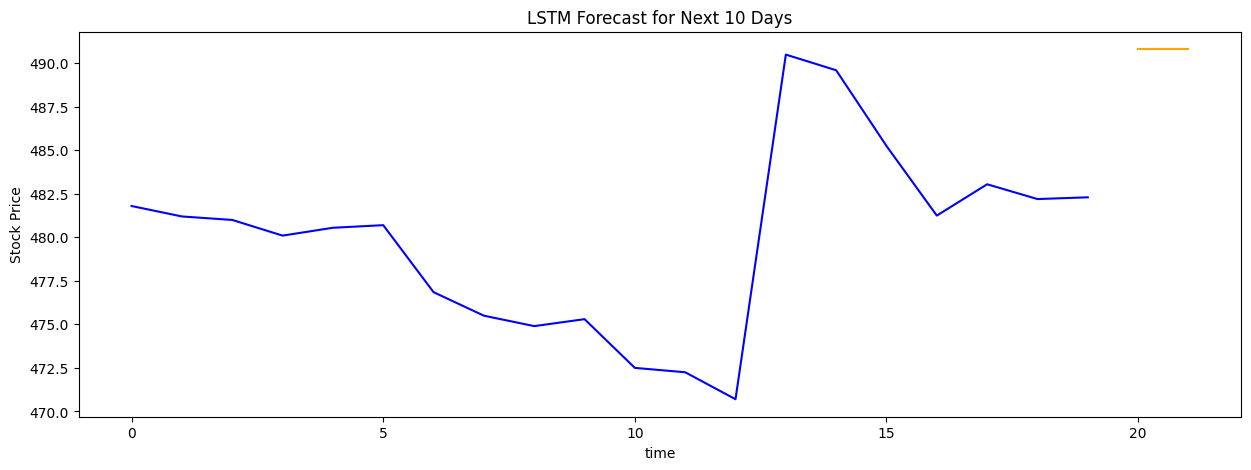

In [44]:
last_10_days = historical_data['close'][len(historical_data) - 20:].tolist()

next_10_days = pd.DataFrame(forecast_output, columns = ['FutureForecast'])

plt.figure(figsize = (15,5))

hist_axis = len(last_10_days)
forecast_axis = hist_axis + len(next_10_days)

plt.plot(np.arange(0,hist_axis),last_10_days, color = 'blue')
plt.plot(np.arange(hist_axis,forecast_axis),next_10_days['FutureForecast'].tolist(), color = 'orange')

plt.title('LSTM Forecast for Next 10 Days')
plt.xlabel('time')
plt.ylabel('Stock Price')

#plt.savefig('Pics_Models/lstm_univariate_forecast_pic1.png')